In [1]:
using MultivariateStats,PyPlot

### Exploring ICA
#### To Do
- brief intro to pca
- Rewrite functions into something sensible
- Show a step by step fitting (i.e. how loss function changes with iteractions for each IC)
- Create an interactive Graph (2 or 3D) where you can rotate the axis and see what happens to the cost-function -i.e. how quickly can you make them independent! - human ICA

In [2]:
maxt = 1000
t = linspace(0,50,maxt)

0.0:0.05005005005005005:50.0

In [18]:
function sharednoise(t)
    r = rand(maxt)
    s1 = sin.(t) + r
    s2 = rem.(t,3) + r
    A = [0.5 0.6 ;
         0.4 0.6];

    mix = A*[s1 s2]'
    W = fit(ICA,mix,2,verbose=false,tol=1.0e-8,maxiter=1000).W
    demixed = (mix' * W)'
    
    return s1,s2,mix,demixed
end

sharednoise (generic function with 1 method)

In [23]:
function independentnoise(t)
    s1 = sin.(t) + rand(maxt)
    s2 = rem.(t,3) + rand(maxt)
    A = [0.5 0.6 ;
         0.4 0.6];

    mix = A*[s1 s2]'
    W = fit(ICA,mix,2,verbose=false,tol=1.0e-8,maxiter=1000).W
    demixed = (mix' * W)'

    return s1,s2,mix,demixed
end

independentnoise (generic function with 1 method)

In [26]:
function plotdemix(axs,s1,s2,mix,demixed)
    ax = axs[1]
    ax[:plot](s1)
    ax[:plot](s2+maximum(s1))
    ax[:set_yticks]([])
    ax[:set_title]("Independent Components (to recover)")

    ax = axs[2]
    ax[:plot](mix[1,:])
    ax[:plot](mix[2,:]+maximum(mix[1,:]))
    ax[:set_yticks]([])
    ax[:set_title]("Mixture (Observed Data)")


    ax = axs[3]
    ax[:plot](demixed[1,:])
    ax[:plot](demixed[2,:]-maximum(demixed[1,:]))
    ax[:set_yticks]([])
    ax[:set_title]("Demixed Components")
end

plotdemix (generic function with 2 methods)

In [27]:
snoise_out = sharednoise(t)
inoise_out = independentnoise(t)

([0.339948, 0.39035, 0.140613, 0.865982, 0.380255, 0.92076, 0.799849, 1.12633, 0.463305, 1.24087  …  0.124999, -0.0565219, 0.320578, 0.131345, -0.11845, -0.155225, -0.0669678, 0.0946262, 0.0332128, -0.190516], [0.574324, 0.159475, 1.07999, 0.600591, 0.373288, 0.468352, 1.05983, 0.878415, 1.3282, 0.938559  …  2.49994, 2.49646, 2.63441, 1.85966, 2.37621, 2.33747, 2.39376, 2.88207, 2.79715, 2.19233], [0.514568 0.29086 … 1.6949 1.22014; 0.480573 0.251825 … 1.69158 1.23919], [0.206134 0.417823 … -0.972809 -1.0263; 0.730318 0.329214 … 2.86384 2.15209], [14.5988 -2.52009; -15.2025 4.21804])

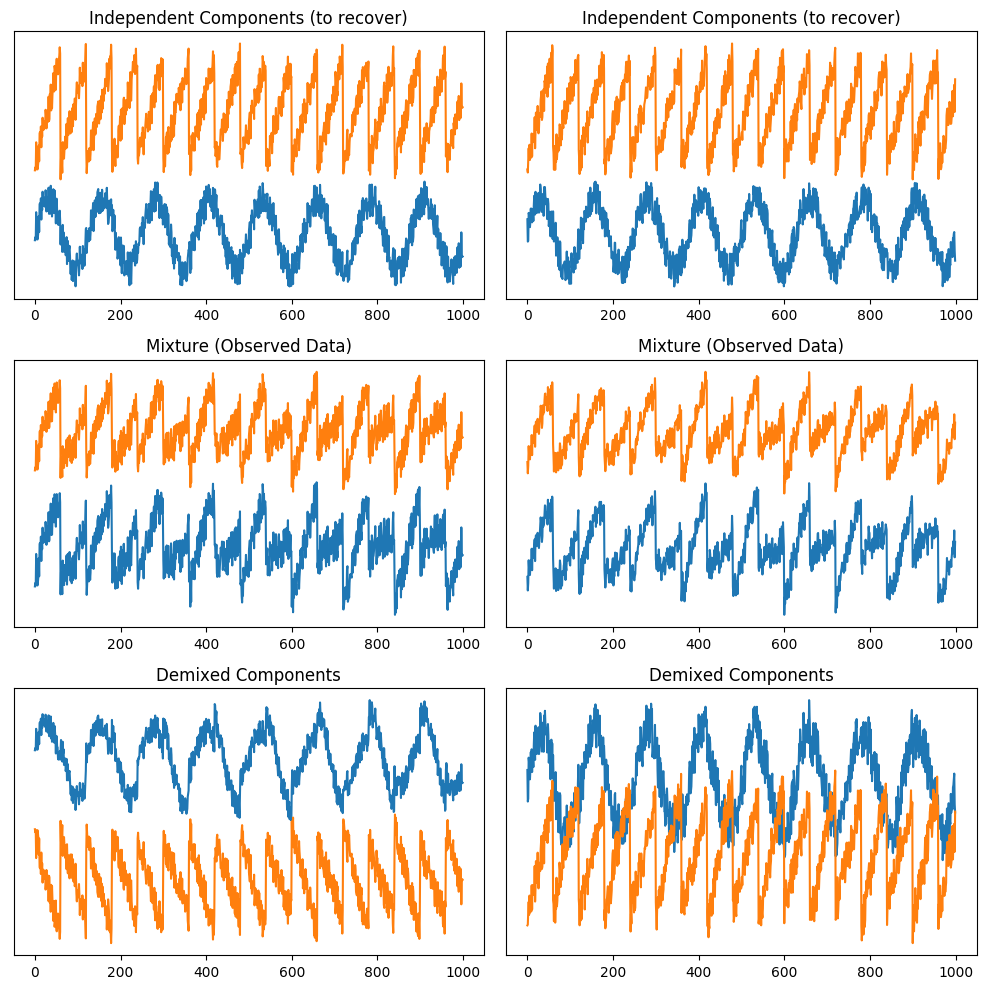

In [22]:
f,axs = subplots(3,2, figsize=(10,10))

plotdemix(axs[:,1],snoise_out...)
plotdemix(axs[:,2],inoise_out...)

tight_layout()